# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mohammad Adam Falah
- **Email:** m.adamfalah12@gmail.com
- **ID:** 7385665

## Menentukan Pertanyaan Bisnis

- Dimana stasiun yang curah hujannya paling tinggi?
- Stasiun mana yang memiliki suhu terendah dan suhu tertinggi?
- Apakah ada hubungan antara suhu udara dengan konsentrasi CO?
- Apakah meningkat atau menurunnya konsentrasi SO2 dapat ditentukan berdasarkan jam?
- Pada stasiun mana konsentrasi polusi tertinggi dan terendah dengan melihat secara keseluruhan polutan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount("dataset")

Mounted at dataset


Menggunakan dataset yang diambil dari google drive

Berikut Mengimport setiap data set yang ada:

In [3]:
aotizhongxin = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
print(aotizhongxin.shape)
aotizhongxin.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
changping = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Changping_20130301-20170228.csv")
print(changping.shape)
changping.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
dingling = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Dingling_20130301-20170228.csv")
print(dingling.shape)
dingling.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
dongsi = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
print(dongsi.shape)
dongsi.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
guanyuan = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Guanyuan_20130301-20170228.csv")
print(guanyuan.shape)
guanyuan.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
gucheng = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Gucheng_20130301-20170228.csv")
print(gucheng.shape)
gucheng.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
huairou = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Huairou_20130301-20170228.csv")
print(huairou.shape)
huairou.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
nongzhanguan = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
print(nongzhanguan.shape)
nongzhanguan.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
shunyi = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Shunyi_20130301-20170228.csv")
print(shunyi.shape)
shunyi.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
tiantan = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Tiantan_20130301-20170228.csv")
print(tiantan.shape)
tiantan.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
wanliu = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
print(wanliu.shape)
wanliu.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
wanshouxigong = pd.read_csv("/content/dataset/MyDrive/dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
print(wanshouxigong.shape)
wanshouxigong.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Menggabungkan Dataset**

In [15]:
data_frames = [aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng, huairou, nongzhanguan, shunyi, tiantan, wanliu, wanshouxigong]

df = pd.concat(data_frames, axis=0)

Menggabungkan semua dataset menjadi satu



In [16]:
print(df.shape)
df.head()

(420768, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Terlihat bahwa sudah tergabung jumlah data 420768, dan 5 datanya teratasnya dari Aotizhongxin



### Assessing Data

In [17]:
print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


Menampilkan 5 data teratas

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB
None


Melihat informasi data yang telah digabung

In [19]:
print(df.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.0000

Menampilkan ringkasan statistik dari masing-masing kolom dari dataset yang telah digabungkan

In [20]:
print(df.isnull().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Terlihat bahwa pada beberapa kolom ada terdapat missing value

In [21]:
print(df.duplicated().sum())

0


Terlihat bahwa tidak ada duplikasi data

In [22]:
print(df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


Melihat tipe data dari masing-masing kolom

In [23]:
correlation_matrix = df.corr()
print(correlation_matrix)

<ipython-input-23-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


             No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03 -2.115260e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02 -1.905981e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00  1.013388e-17   
hour   0.000684 -2.115260e-15 -1.905981e-16  1.013388e-17  1.000000e+00   
PM2.5 -0.023569 -2.583578e-02  1.043824e-02  3.428114e-03  1.170939e-02   
PM10  -0.044217 -3.772263e-02 -2.537989e-02  2.601467e-02  5.142637e-02   
SO2   -0.226739 -1.702462e-01 -2.138978e-01 -5.145818e-03  2.994683e-02   
NO2   -0.046553 -5.627017e-02  4.229308e-02  9.877839e-03 -1.558836e-03   
CO     0.019660  7.861472e-03  4.664755e-02 -1.569193e-02 -3.135823e-02   
O3    -0.050868 -2.438435e-02 -1.036914e-01  2.829179e-03  2.822873e-01   
TEMP  -0.122409 -1.517906e-01  1.313233e-01  1.439033e-02  1.419834e-01   
PRES   0.188280  1.866617

Mencari korelasi antar kolom

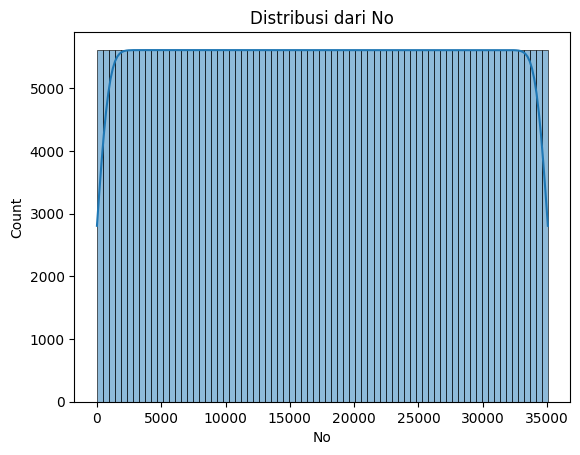

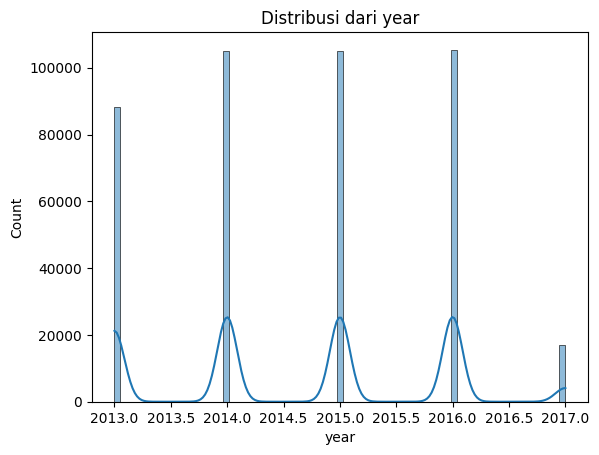

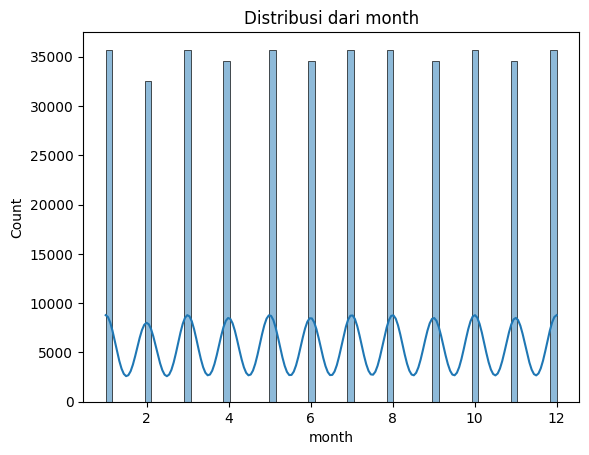

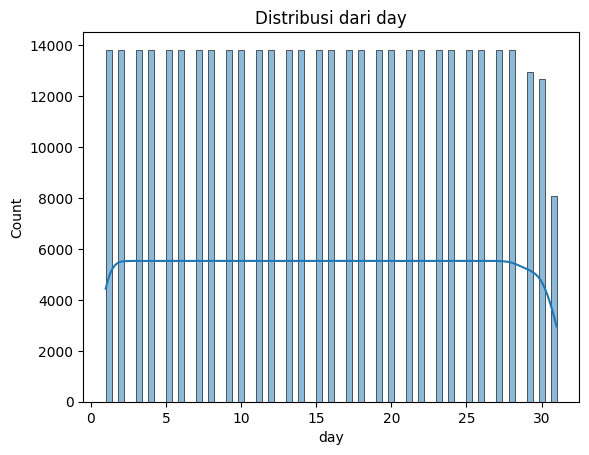

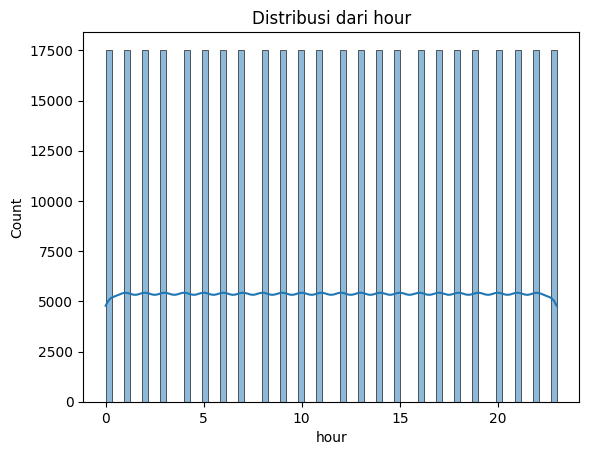

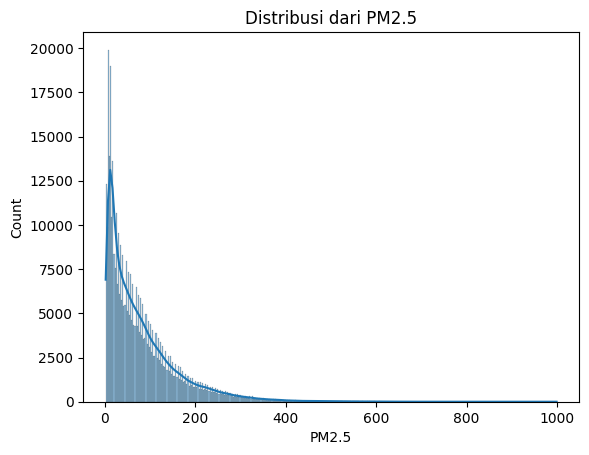

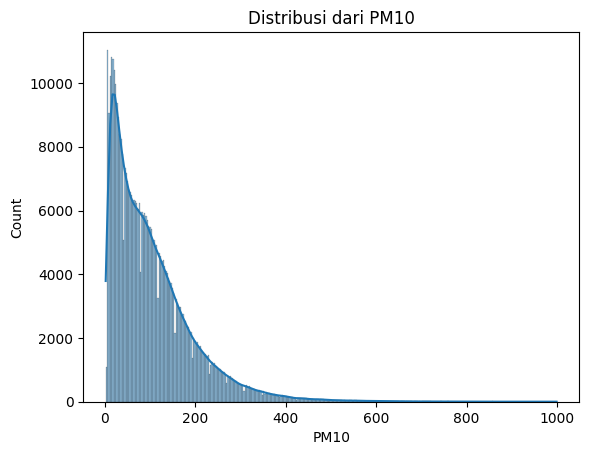

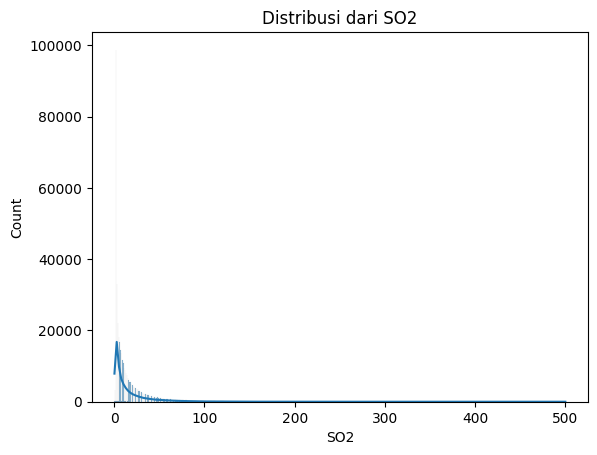

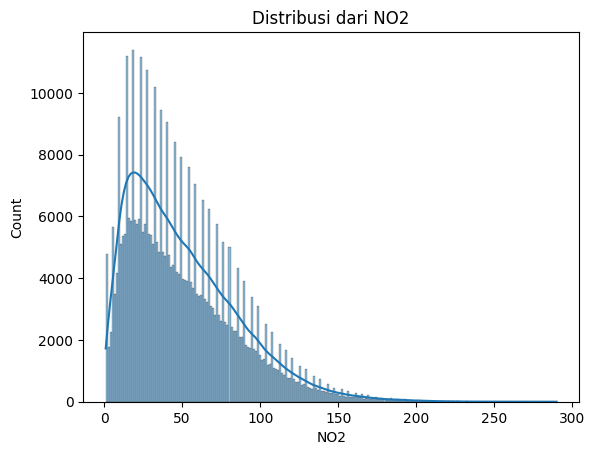

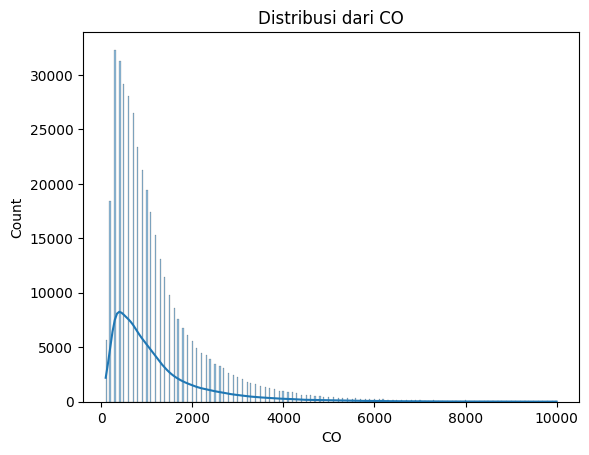

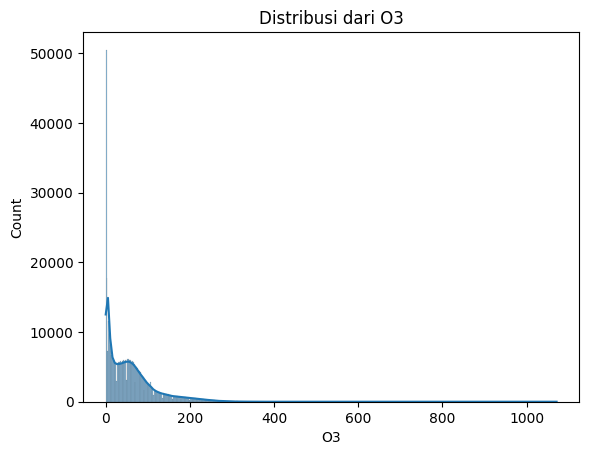

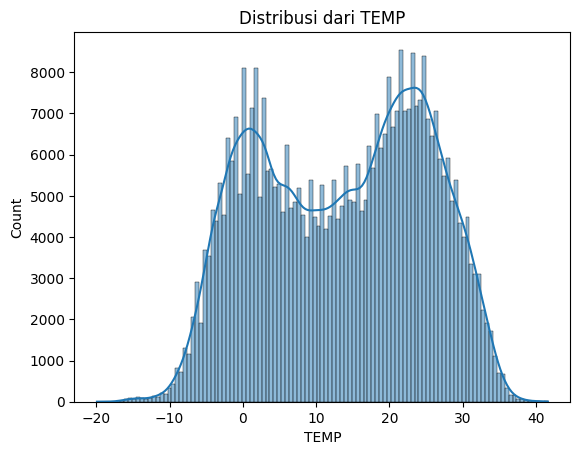

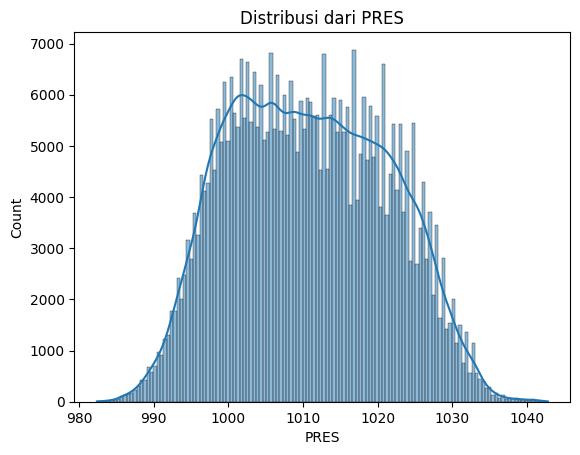

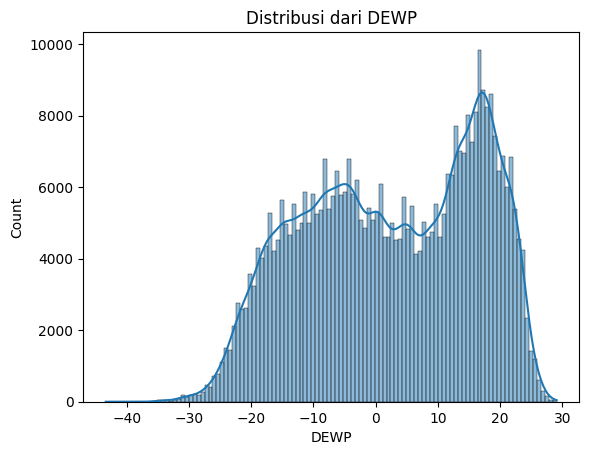

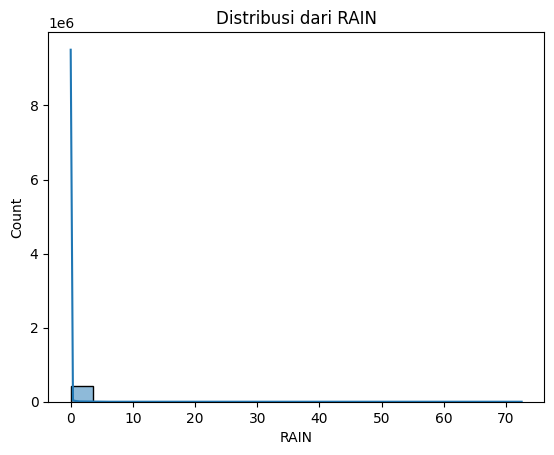

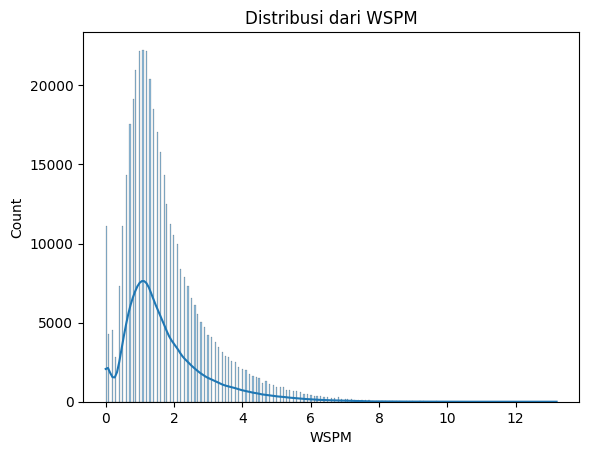

In [24]:
for column in df.select_dtypes(include="number").columns:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribusi dari {column}")
    plt.show()

Melihat distribusi dari masing-masing kolom

### Cleaning Data


#### Menangani Missing Value

Harus menangani Missing Value dikarenakan terlihat sangat banyak data yang memiliki Missing Value

In [25]:
df.fillna(df.mean(), inplace=True)

<ipython-input-25-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [26]:
wd_mode = df["wd"].mode()[0]
df["wd"].fillna(wd_mode, inplace=True)

Penanganan Missing Value disini dilakukan dengan cara, mengisi Missing Value tersebut dengan nilai mean. Terkecuali pada wd yang menggunakan modus untuk mengisi Missing Value, dikarenakan wd bukan berupa angka sehingga tidak memiliki mean.

In [27]:
print("Jumlah data", df.shape[0])
print("Jumlah Missing Value per kolom:")
print(df.isnull().sum())

Jumlah data 420768
Jumlah Missing Value per kolom:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Terlihat disini jumlah datanya masih sama yaitu 420768 yang berarti tidak ada data yang dihapus, dan bisa dilihat untuk nilai Missing Value sudah tidak ada

#### Menghilangkan kolom yang tidak digunakan
Bisa dilihat pada data, terdapat 18 kolom tetapi tidak semua digunakan kita akan menghilangkan kolom yang tidak akan digunakan

In [28]:
kolom_tidak_digunakan = ["PM10", "PRES", "DEWP", "wd", "WSPM"]
df_cleaned = df.drop(kolom_tidak_digunakan, axis=1)

In [29]:
# Mendefinisikan fungsi untuk membersihkan outlier berdasarkan z-score
def remove_outliers(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include="number"))
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]

# Membersihkan outlier dari DataFrame df_cleaned
df_cleaned_no_outliers = remove_outliers(df_cleaned)

# Memeriksa dimensi DataFrame setelah membersihkan outlier
print("Jumlah baris sebelum cleaning outliers:", df_cleaned.shape[0])
print("Jumlah baris setelah cleaning outliers:", df_cleaned_no_outliers.shape[0])


Jumlah baris sebelum cleaning outliers: 420768
Jumlah baris setelah cleaning outliers: 389845


Hal ini dilakukan untuk memastikan data yang dianalisis tidak terpengaruh nilai-nilai ekstrim

In [30]:
print("Jumlah data", df_cleaned_no_outliers.shape[0])
print("Jumlah kolom", df_cleaned_no_outliers.shape[1], "\n")
print(df_cleaned_no_outliers.info(), "\n")
print(df_cleaned_no_outliers.describe())

Jumlah data 389845
Jumlah kolom 13 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389845 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       389845 non-null  int64  
 1   year     389845 non-null  int64  
 2   month    389845 non-null  int64  
 3   day      389845 non-null  int64  
 4   hour     389845 non-null  int64  
 5   PM2.5    389845 non-null  float64
 6   SO2      389845 non-null  float64
 7   NO2      389845 non-null  float64
 8   CO       389845 non-null  float64
 9   O3       389845 non-null  float64
 10  TEMP     389845 non-null  float64
 11  RAIN     389845 non-null  float64
 12  station  389845 non-null  object 
dtypes: float64(7), int64(5), object(1)
memory usage: 41.6+ MB
None 

                  No           year          month            day  \
count  389845.000000  389845.000000  389845.000000  389845.000000   
mean    17619.323021    2014.670097       6.551227      15.7

Data yang telah dibersihkan sudah difix, dengan menampilkan deskripsi dan informasi pada masing-masing kolom data

## Exploratory Data Analysis (EDA)

### Explore

**Deskripsi Seleruh Data**

In [31]:
df_cleaned_no_outliers.describe(include="all")

,No,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,RAIN,station
count,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845.000000,389845
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33411
mean,17619.323021,2014.670097,6.551227,15.743198,11.402137,69.190328,13.248559,47.491041,1072.264220,55.526423,13.708938,0.021498,NaN
std,10112.428234,1.179529,3.403933,8.791411,6.930053,62.420201,15.350232,30.409933,802.813343,49.051639,11.228252,0.157049,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,0.000000,NaN
25%,9041.000000,2014.000000,4.000000,8.000000,5.000000,19.000000,2.000000,23.000000,500.000000,13.000000,3.700000,0.000000,NaN
50%,17719.000000,2015.000000,7.000000,16.000000,11.000000,52.000000,7.000000,43.000000,900.000000,48.000000,14.900000,0.000000,NaN
75%,26426.000000,2016.000000,9.000000,23.000000,17.000000,98.000000,17.000000,66.000000,1300.000000,79.254000,23.200000,0.000000,NaN


Berdasarkan tabel diatas dapat ditarik informasi:
*   Data dikumpulkan dari tahun 2013 hingga 2017
*   Rata-rata konsentrasi PM2.5 adalah sekitar 69.19 dengan nilai maksimum mencapai 319.00
*   Rata-rata konsentrasi SO2 adalah sekitar 13.25 dengan nilai maksimum mencapai 80.00
*   Rata-rata konsentrasi NO2 adalah sekitar 47.49 dengan nilai maksimum mencapai 154.00
*   Rata-rata konsentrasi CO adalah sekitar 1072.26 dengan nilai maksimum mencapai 4600.00
*   Rata-rata konsentrasi O3 adalah sekitar 55.53 dengan nilai maksimum mencapai 224.00
*   Rata-rata suhu udara adalah sekitar 13.71°C dengan rentang dari -19.9 hingga 41.6
*   Rata-rata curah hujan adalah 0.021498, tetapi 75% dari data tidak memiliki curah hujan
*   Data berasal dari 12 stasiun yang berbeda, stasiun Dingling memiliki frekuensi pengamatan terbanyak









**Rata-rata Konsentrasi setiap polutan dan Keseluruhan polutan berdasarkan stasiun**

In [32]:
meanPolutan = df_cleaned_no_outliers.groupby(by="station").agg({
    "SO2": ["mean"],
    "NO2": ["mean"],
    "CO": ["mean"],
    "O3": ["mean"]
})

meanPolutan["kadar_polusi"] = meanPolutan.mean(axis=1)

print(meanPolutan)

                     SO2        NO2           CO         O3 kadar_polusi
                    mean       mean         mean       mean             
station                                                                 
Aotizhongxin   14.359122  55.070001  1069.535789  54.877929   298.460710
Changping      12.686036  42.154185  1019.860277  55.920030   282.655132
Dingling       10.887940  27.070415   857.373642  64.869738   240.050434
Dongsi         15.381134  50.485500  1151.106551  56.314470   318.321914
Guanyuan       14.288743  54.033066  1094.413460  54.680777   304.354011
Gucheng        13.069097  52.611177  1161.763860  55.742019   320.796538
Huairou        10.660837  31.921920   956.262066  56.399486   263.811077
Nongzhanguan   14.927252  53.734170  1104.507154  56.827728   307.499076
Shunyi         11.843191  41.977193  1050.320260  53.155065   289.323927
Tiantan        12.268770  50.774811  1140.998091  53.287369   314.332260
Wanliu         15.161617  60.252523  1106.465646  4

Informasi yang dapat diambil:

*   Rata-rata kadar SO2 tertinggi di stasiun Dongsi
*   Rata-rata kadar NO2 tertinggi di stasiun Wanliu
*   Rata-rata kadar CO tertinggi di stasiun Wanshouxigong
*   Rata-rata kadar O3 tertinggi di stasiun Dingling
*   Kadar polusi tertinggi di stasiun Wanshouxigong dengan nilai 321.804833
*   Kadar polusi terendah di stasiun Dingling dengan nilai 240.050434





**Melihat Maksimum Minimum Curah hujan dan Temperatur pada setiap stasiun**

In [33]:
df_cleaned_no_outliers.groupby(by="station").agg({
    "TEMP": ["max", "min"],
    "RAIN": ["max", "min"],
})

TEMP       RAIN     
                max   min  max  min
station                            
Aotizhongxin   40.5 -16.8  2.5  0.0
Changping      41.4 -16.6  2.5  0.0
Dingling       41.4 -16.6  2.5  0.0
Dongsi         41.1 -16.8  2.5  0.0
Guanyuan       40.5 -16.8  2.5  0.0
Gucheng        41.6 -15.6  2.5  0.0
Huairou        40.3 -19.9  2.5  0.0
Nongzhanguan   40.0 -16.8  2.5  0.0
Shunyi         40.6 -16.8  2.5  0.0
Tiantan        40.0 -16.8  2.5  0.0
Wanliu         40.5 -15.8  2.5  0.0
Wanshouxigong  40.6 -16.8  2.5  0.0

Kesimpulan:
*   Suhu tertinggi pada stasiun Gucheng dengan nilai 41.6 dan suhu terendah pada stasiun Huairou dengan nilai -19.9
*   Curah hujan pada setiap stasiun sama yaitu dengan nilai maksimal 2.5 dan nilai minimal 0



## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimana stasiun yang curah hujannya paling tinggi?

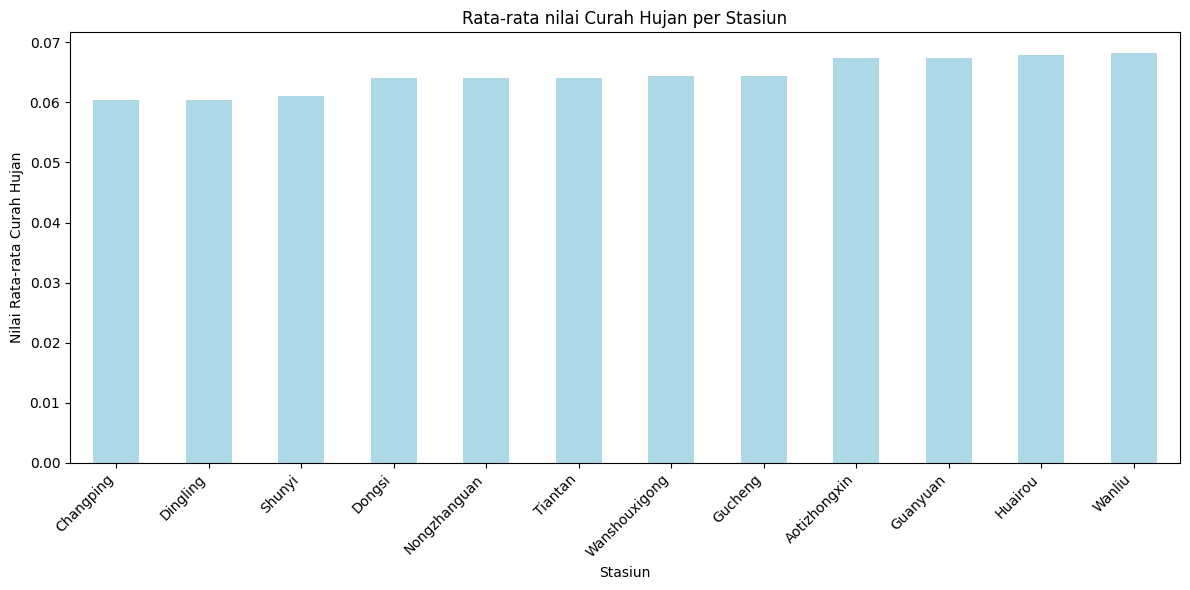

In [34]:
rain_levels = df_cleaned.groupby("station")["RAIN"].mean().sort_values()

# Membuat plot
plt.figure(figsize=(12, 6))
rain_levels.plot(kind="bar", color="lightblue")
plt.title("Rata-rata nilai Curah Hujan per Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Nilai Rata-rata Curah Hujan")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [35]:
print(rain_levels)

station
Changping        0.060372
Dingling         0.060372
Shunyi           0.061099
Dongsi           0.064020
Nongzhanguan     0.064020
Tiantan          0.064020
Wanshouxigong    0.064320
Gucheng          0.064453
Aotizhongxin     0.067419
Guanyuan         0.067419
Huairou          0.067934
Wanliu           0.068261
Name: RAIN, dtype: float64


Penjelasan analisis:

Berdasarkan grafik diatas dapat diambil analisis bahwa nilai rata-rata curah hujan tertinggi di stasiun Wanliu

### Pertanyaan 2: Stasiun mana yang memiliki suhu terendah dan suhu tertinggi?

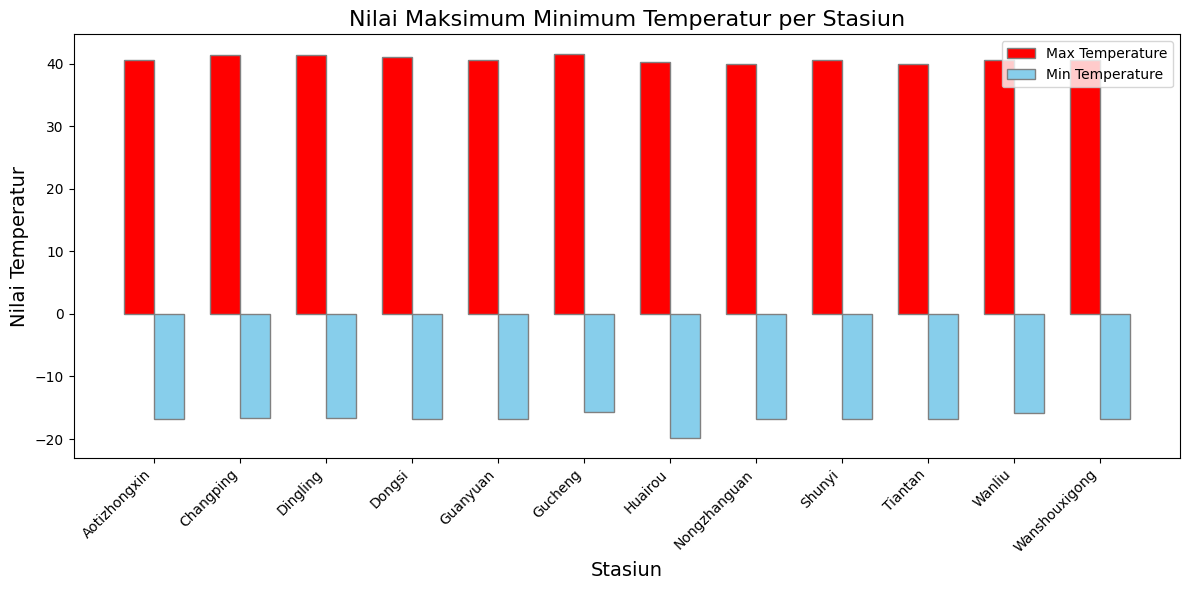

In [36]:
volume_mean = df_cleaned_no_outliers.groupby(by="station").agg({
    "TEMP": ["max", "min"]
})

stations = volume_mean.index
maxTemp = volume_mean["TEMP"]["max"]
minTemp = volume_mean["TEMP"]["min"]

bar_width = 0.35

r1 = range(len(stations))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, maxTemp, color="red", width=bar_width, edgecolor="grey", label="Max Temperature")
plt.bar(r2, minTemp, color="skyblue", width=bar_width, edgecolor="grey", label="Min Temperature")

plt.xlabel("Stasiun", fontsize=14)
plt.ylabel("Nilai Temperatur", fontsize=14)
plt.title("Nilai Maksimum Minimum Temperatur per Stasiun", fontsize=16)

plt.xticks([r + bar_width/2 for r in range(len(stations))], stations, rotation=45, ha="right")

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

Penejelasan Analisis:

Berdasarkan grafik diatas dapat disimpulkan bahwa stasiun dengan Temperatur tertinggi adalah Gucheng dan stasiun dengan Temperatur terendah adalah Huairou

### Pertanyaan 3: Apakah ada hubungan antara suhu udara dengan konsentrasi CO?

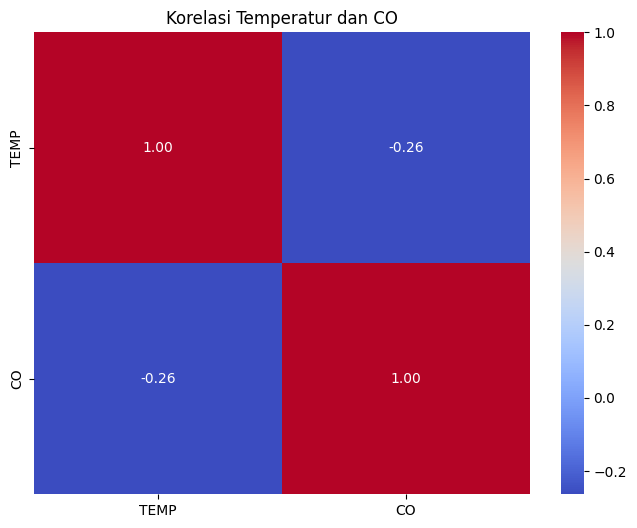

In [37]:
correlation_matrix = df_cleaned_no_outliers[["TEMP", "CO"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f") # Matrix heatmap
plt.title("Korelasi Temperatur dan CO")
plt.show()

Penejelasan Analisis:

Terlihat bahwa Temperatur dan CO memiliki nilai korelasi yang negatif, yang berarti korelasi antara keduanya lemah

### Pertanyaan 4: Apakah meningkat atau menurunnya konsentrasi SO2 dapat ditentukan berdasarkan jam?

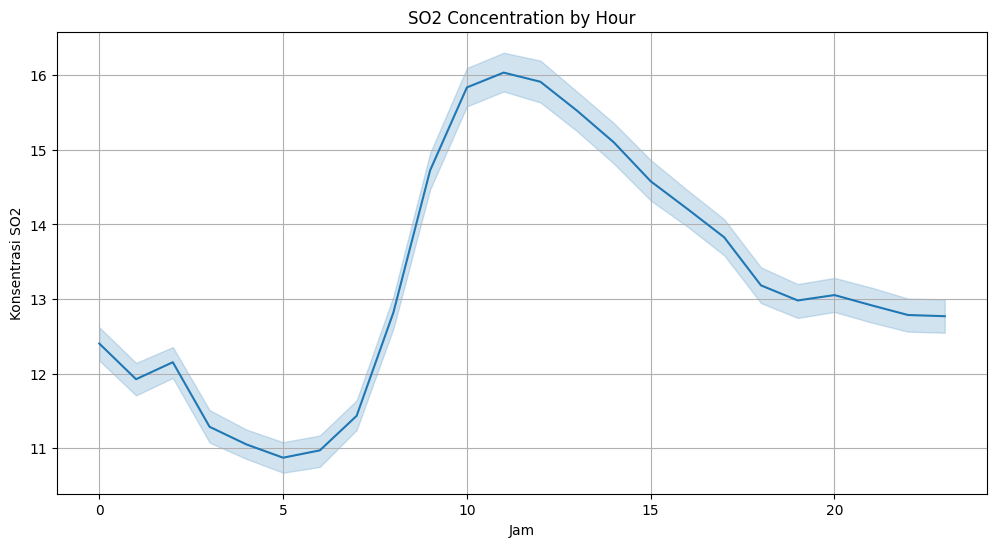

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned_no_outliers, x="hour", y="SO2")
plt.title("SO2 Concentration by Hour")
plt.xlabel("Jam")
plt.ylabel("Konsentrasi SO2")
plt.grid(True)
plt.show()


Penejelasan Analisis:

Dilihat dari grafik SO2 dapat ditentukan berdasarkan jam, yang mana pada pagi hingga ke siang konsentrasi SO2 akan meningkat. Kemudian pada siang hari hingga pagi konsentrasi SO2 akan menurun

### Pertanyaan 5: Pada stasiun mana konsentrasi polusi tertinggi dan terendah dengan melihat secara keseluruhan polutan?

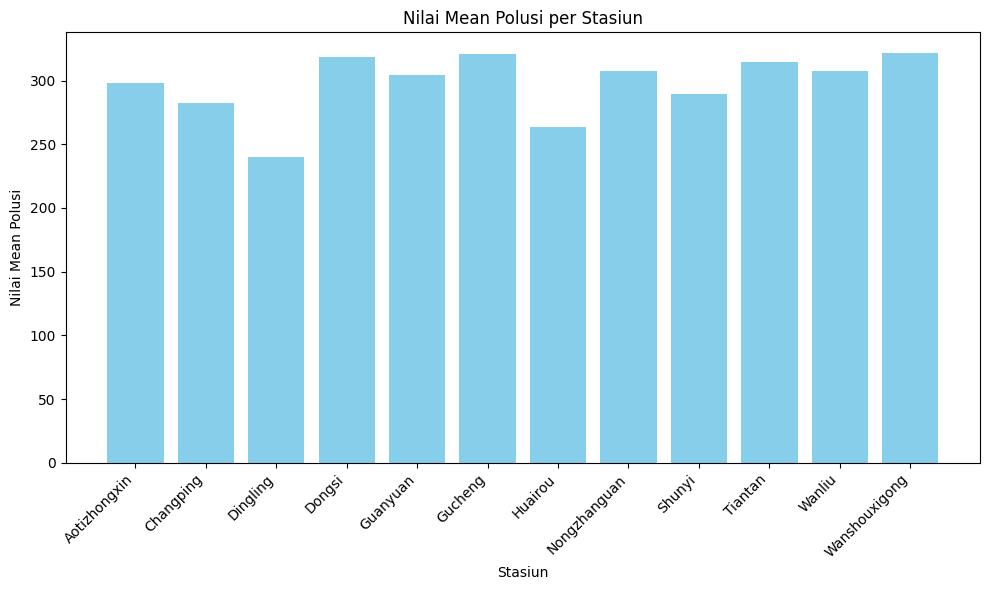

In [39]:
stations = meanPolutan.index
nilaiMeanPolutan = meanPolutan["kadar_polusi"]

plt.figure(figsize=(10, 6))
plt.bar(stations, nilaiMeanPolutan, color="skyblue")

plt.xlabel("Stasiun")
plt.ylabel("Nilai Mean Polusi")
plt.title("Nilai Mean Polusi per Stasiun")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Penejelasan Analisis:

Terlihat bahwa konsentrasi polusi tertinggi terdapat pada stasiun Wanshouxigong dan konsentrasi polusi terendah terdapat pada stasiun Dingling

## Conclusion

1. Dimana stasiun yang curah hujannya paling tinggi?
> Walaupun tidak jauh berbeda nilainya, tetapi curah hujan tertinggi berada di stasiun Wanliu dengan nilai curah hujan 0.068261

2. Stasiun mana yang memiliki suhu terendah dan suhu tertinggi?
> Stasiun yang memiliki suhu terendah adalah stasiun Huairou dengan nilai -19.9, dan stasiun yang memiliki suhu tertinggi adalah stasiun Guchen dengan nilai 41.6

3. Apakah ada hubungan antara suhu udara dengan konsentrasi CO?
> Suhu udara atau temperatur memiliki korelasi yang lemah terhadap CO yang bernilai -0.26, dan berkorelasi negatif

4. Apakah meningkat atau menurunnya konsentrasi SO2 dapat ditentukan berdasarkan jam?
> Iya, Konsetrasi SO2 dapat ditentukan berdasarkan jam. Yang mana konsentrasi SO2 akan meningkat saat pagi hingga siang (jam 5 pagi hingga jam 11 siang), dan konsentrasi SO2 akan menurun saat siang hingga pagi (jam 11 siang hingga jam 5 pagi)

5. Pada stasiun mana konsentrasi polusi tertinggi dan terendah dengan melihat secara keseluruhan polutan?
> Stasiun yang memiliki konsentrasi polusi tertinggi adalah stasiun Wanshouxigong dengan nilai rata-rata konsentrasi polusi 321.80, dan stasiun yang memiliki konsentrasi polusi terendah adalah stasiun Dingling dengan nilai rata-rata konsentrasi polusi 240.05